In [1]:
import json
import os
import math
import librosa
import pandas as pd
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
audio_file = 'CiceseBankAudios/Daniel/Daniel1.wav'

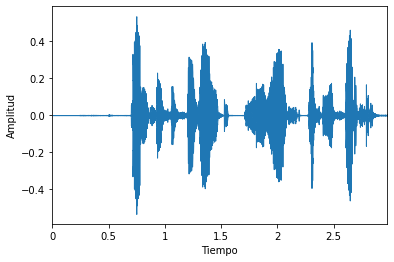

In [3]:
data, sr = librosa.load(audio_file, sr = 22050)
librosa.display.waveplot(data, sr = sr)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.show()

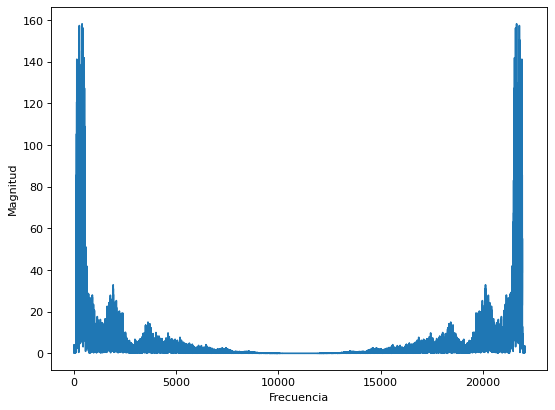

In [4]:
fft = np.fft.fft(data)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

figure(figsize=(8, 6), dpi=80)
plt.plot(frequency, magnitude)
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

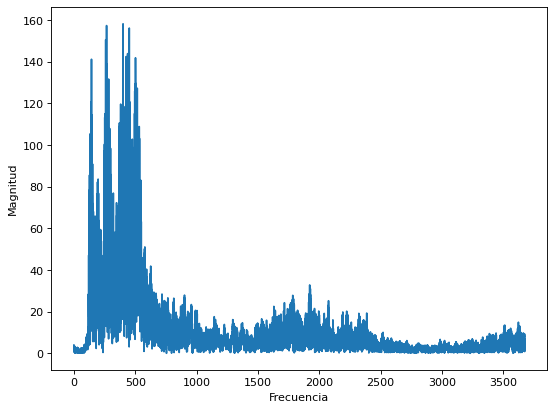

In [5]:
left_frequency=frequency[:int(len(frequency)/6)]
left_magnitude=magnitude[:int(len(magnitude)/6)]

figure(figsize=(8, 6), dpi=80)
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frecuencia")
plt.ylabel("Magnitud")
plt.show()

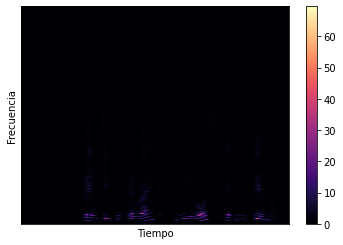

In [6]:
n_fft = 2048
hop_length = 512

stft = librosa.core.stft(data, hop_length= hop_length, n_fft= n_fft )
spectogram = np.abs(stft)

librosa.display.specshow(spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.show()

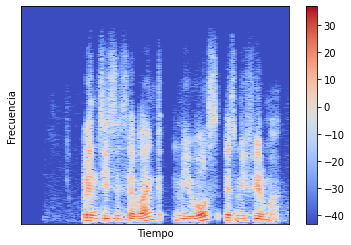

In [7]:
log_spectogram = librosa.amplitude_to_db(spectogram)

librosa.display.specshow(log_spectogram, sr=sr, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("Frecuencia")
plt.colorbar()
plt.show()

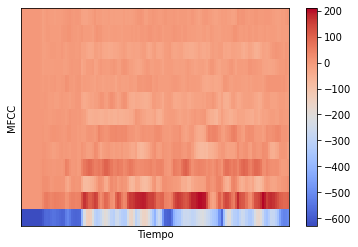

In [8]:
mfccs = librosa.feature.mfcc(data, n_fft= n_fft, hop_length=hop_length, n_mfcc=13)
librosa.display.specshow(mfccs, sr=sr, hop_length=hop_length)
plt.xlabel("Tiempo")
plt.ylabel("MFCC")
plt.colorbar()
plt.show()

In [9]:
AUDIO_PATH = "CiceseBankAudios"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 2.7 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

In [10]:
def save_mfcc(audio_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(audio_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not audio_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		# load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

In [11]:
if __name__ == "__main__":
    save_mfcc(AUDIO_PATH, JSON_PATH, num_segments=10)


Processing: CiceseBankAudios\Alejandra
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:1
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:2
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:3
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:4
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:5
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:6
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:7
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:8
CiceseBankAudios\Alejandra\Alejandra1.wav, segment:9


C:\Users\Xneto\AppData\Local\Programs\Python\Python39\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=964
  warnings.warn(


CiceseBankAudios\Alejandra\Alejandra2.wav, segment:1
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:2
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:3
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:4
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:5
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:6
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:7
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:8
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:9
CiceseBankAudios\Alejandra\Alejandra2.wav, segment:10
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:1
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:2
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:3
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:4
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:5
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:6
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:7
CiceseBankAudios\Alejandra\Alejandra3.wav, segment:8
CiceseBankAudios\Alejandra\Alejandra3.wav, se